In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [63]:
data1 = pd.read_csv('single_layered_copy.csv')
baseline_data = pd.read_csv('baseline.csv')

# Separate data by tile size
layers = data1['Layer'].unique()
ranks = data1['Steps'].unique()[1:]

baseline_bleu = baseline_data['BLEU Score'][0]

baseline_fscore = baseline_data['Character Fscore'][0]

In [6]:
baseline_fscore

0.2646672440784473

In [5]:
baseline_bleu

41.337328250540224

# Layerwise Optimisation Matrix Approximation: Same Rank
## Single Matrix Approximation with Tile Size 64 and Varying Ranks

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_89386/2115679922.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(layers))


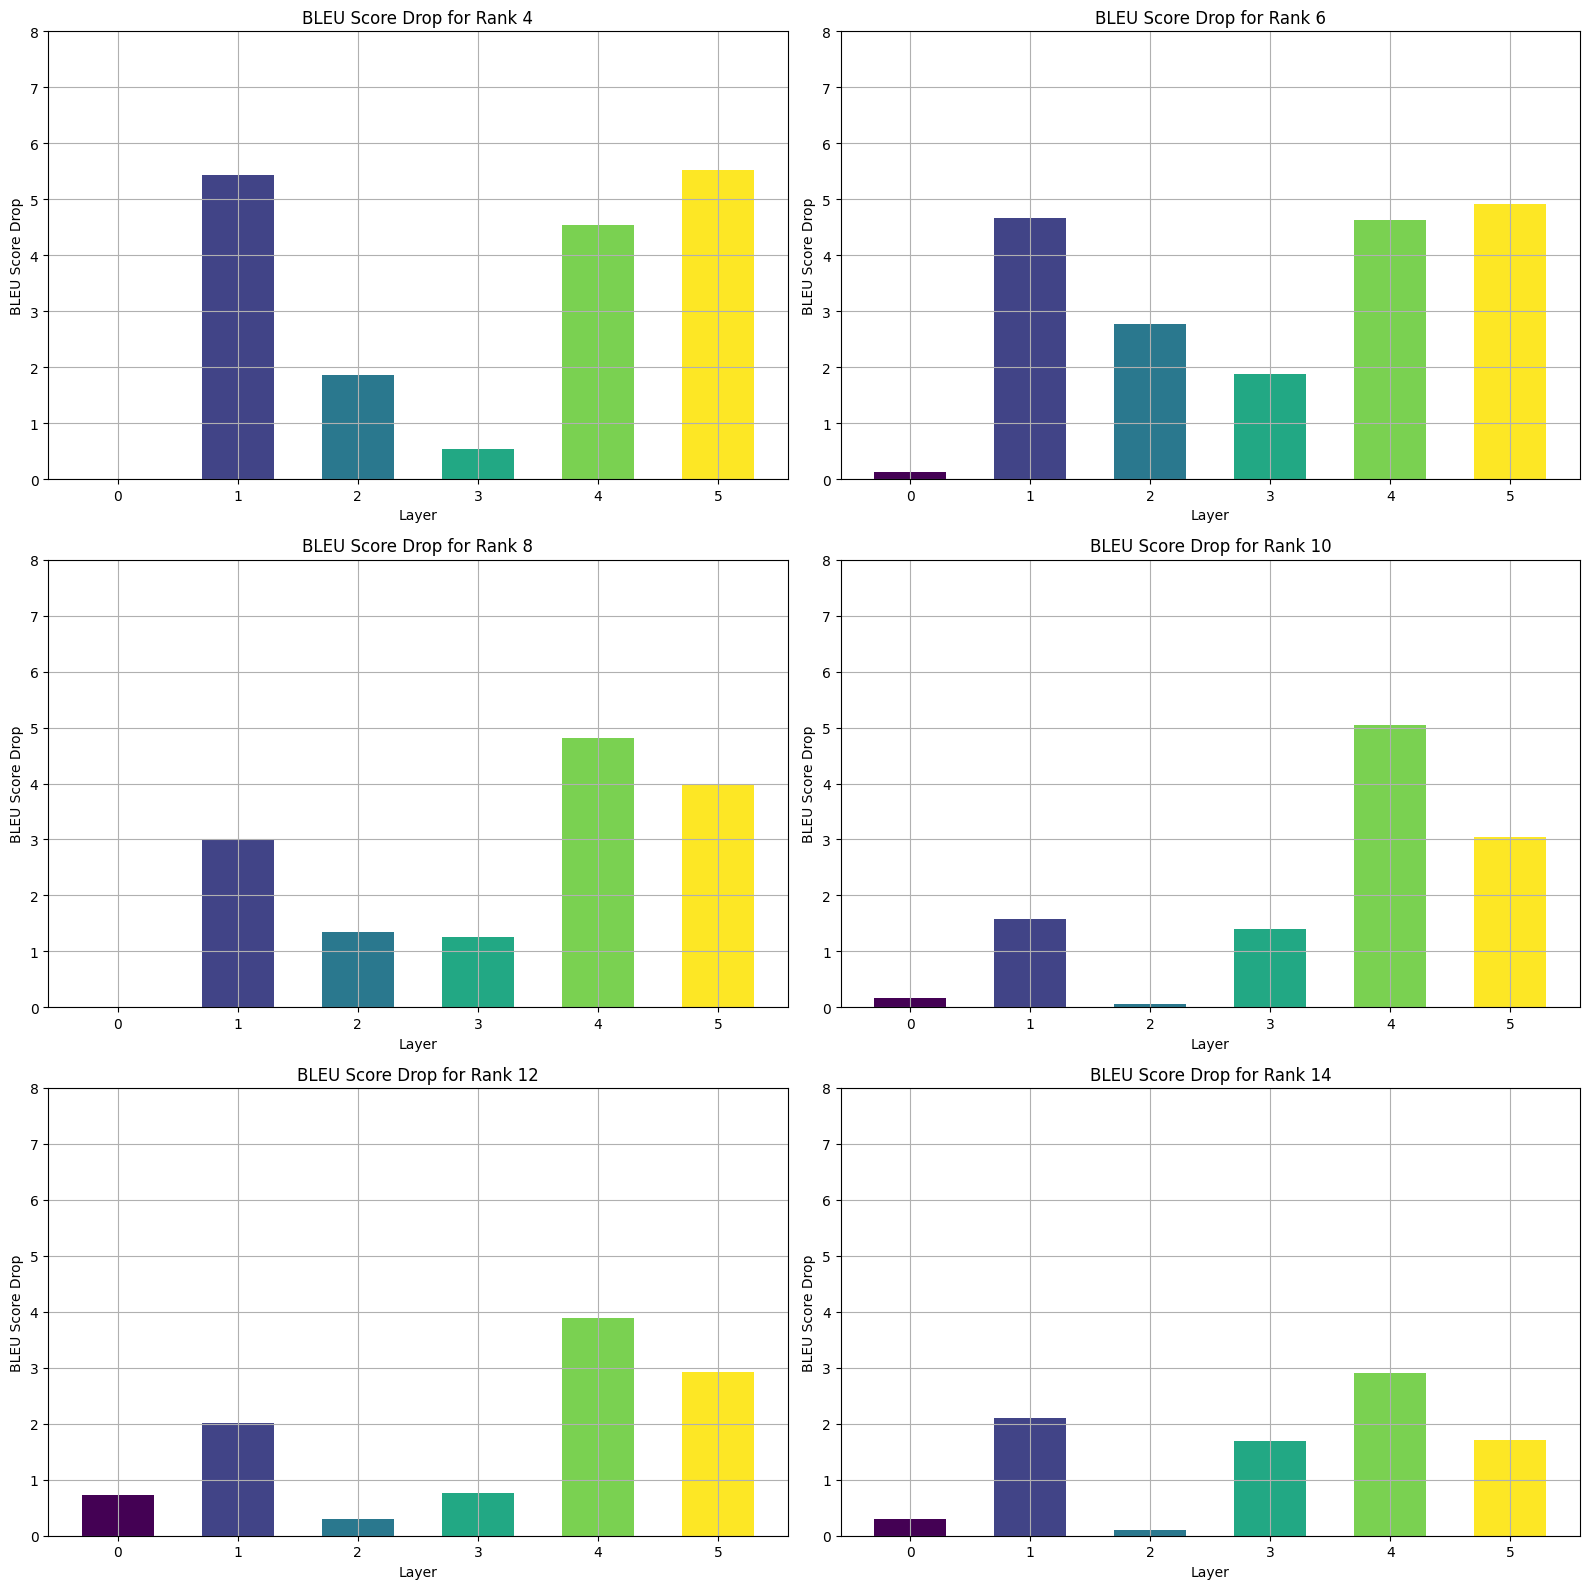

In [64]:
# Define the number of rows and columns for subplots
n_cols = 2
n_rows = len(ranks) // 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))
axes = axes.ravel()

for idx, rank in enumerate(ranks):
    layers = data1[data1['Steps'] == rank]['Layer']
    bleu_scores = data1[data1['Steps'] == rank]['BLEU Score']

    # Create the colormap from viridis
    viridis = cm.get_cmap('viridis', len(layers))

    # Normalize layer data for coloring
    norm = plt.Normalize(min(layers), max(layers))
    colors = viridis(norm(layers))

    # Plotting in respective subplot
    ax = axes[idx]
    ax.bar(layers, baseline_bleu - bleu_scores, color=colors, width=0.6)

    # Adding labels and title
    ax.set_xlabel('Layer')
    ax.set_ylim([0,8])
    ax.set_ylabel('BLEU Score Drop')
    ax.set_title(f'BLEU Score Drop for Rank {rank}')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_89386/1973704335.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(ranks))


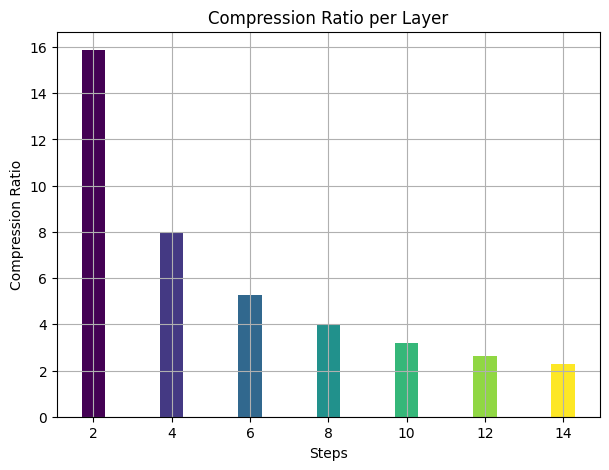

In [73]:
ranks = data1[data1['Layer'] == 0]['Steps']
compression_ratios = data1[data1['Layer'] == 0]['Compression Ratio']

# Create the colormap from viridis
viridis = cm.get_cmap('viridis', len(ranks))

# Normalize rank data for coloring
norm = plt.Normalize(min(ranks), max(ranks))
colors = viridis(norm(ranks))

# Create the plot
plt.figure(figsize=(7, 5))
plt.bar(ranks, compression_ratios, color=colors, width=0.6)

# Adding labels and title
plt.xlabel('Steps')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio per Layer')
plt.grid(True)

# Layerwise Optimisation Approximation Method Comparison
## Tile Size 64

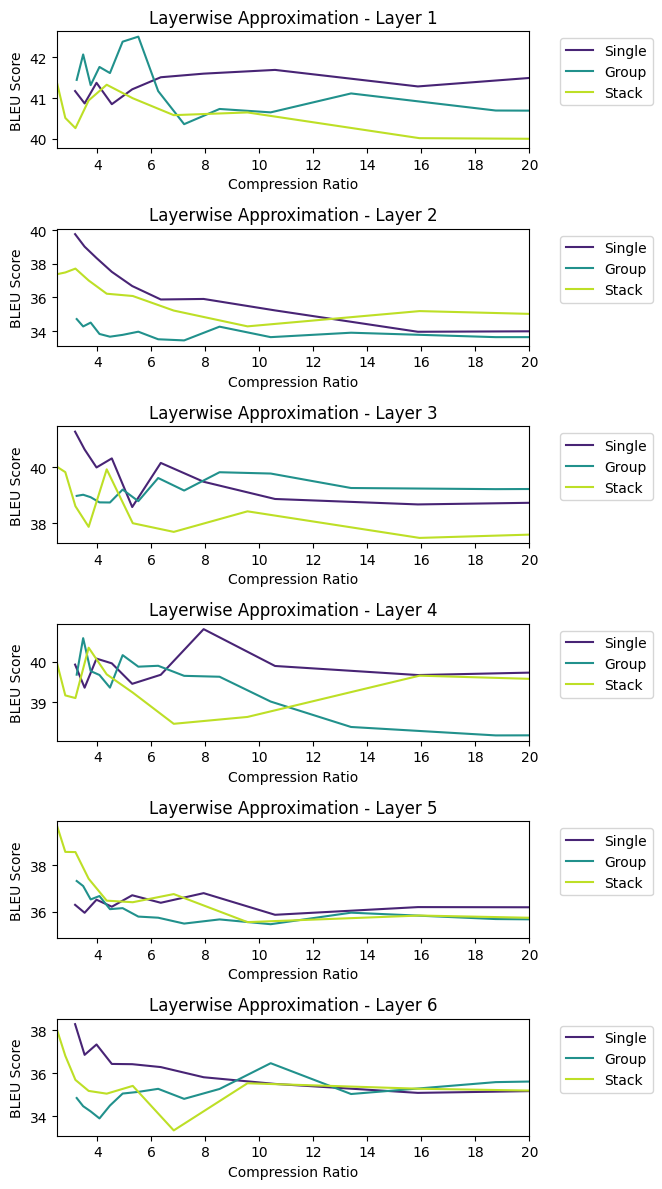

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

single = pd.read_csv('layered_results_single.csv')
group = pd.read_csv('layered_results_group.csv')
stack = pd.read_csv('layered_results_stack.csv')

# Colormap
colormap = plt.get_cmap('viridis')

# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(8, 12))

for i in range(6):
    # Filter for Layer == i
    single_layer = single['Layer'] == i
    group_layer = group['Layer'] == i
    stack_layer = stack['Layer'] == i

    # Plot Single
    axs[i].plot(single['Compression Ratio'][single_layer], single['BLEU Score'][single_layer], 
                color=colormap(0.1), label='Single')
    # Plot Group
    axs[i].plot(group['Compression Ratio'][group_layer], group['BLEU Score'][group_layer], 
                color=colormap(0.5), label='Group')
    # Plot Stack
    axs[i].plot(stack['Compression Ratio'][stack_layer], stack['BLEU Score'][stack_layer], 
                color=colormap(0.9), label='Stack')

    axs[i].set_title(f'Layerwise Optimisation Approximation - Layer {i+1}')
    axs[i].set_xlabel('Compression Ratio')
    axs[i].set_ylabel('BLEU Score')
    axs[i].set_xlim([2.5,20])
    
    # Add legend outside the plot area
    axs[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for legends outside the plotting area
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_89386/4119558801.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  highest_compression = pd.concat([highest_compression, pd.DataFrame({


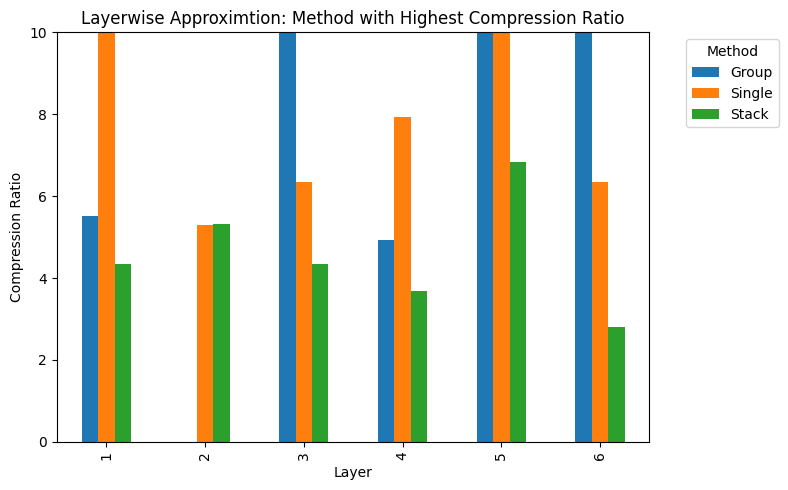

In [50]:
# Threshold for BLEU score
thresholds = [41.2,36,39.5,40,36,36]
41.3

# Initialize a DataFrame to store the highest compression ratio per layer and method
highest_compression = pd.DataFrame(columns=['Layer', 'Method', 'Compression Ratio'])

# Loop over layers
for i in range(6):
    threshold = thresholds[i]
    # Filter for each layer and threshold condition
    single_layer = single[single['Layer'] == i]
    group_layer = group[group['Layer'] == i]
    stack_layer = stack[stack['Layer'] == i]

    # Filter rows where BLEU score is above threshold
    single_above_threshold = single_layer[single_layer['BLEU Score'] > threshold]
    group_above_threshold = group_layer[group_layer['BLEU Score'] > threshold]
    stack_above_threshold = stack_layer[stack_layer['BLEU Score'] > threshold]

    # Find the highest compression ratio for each method
    if not single_above_threshold.empty:
        single_max = single_above_threshold.loc[single_above_threshold['Compression Ratio'].idxmax()]
        highest_compression = pd.concat([highest_compression, pd.DataFrame({
            'Layer': [i+1], 'Method': ['Single'], 'Compression Ratio': [single_max['Compression Ratio']]
        })], ignore_index=True)

    if not group_above_threshold.empty:
        group_max = group_above_threshold.loc[group_above_threshold['Compression Ratio'].idxmax()]
        highest_compression = pd.concat([highest_compression, pd.DataFrame({
            'Layer': [i+1], 'Method': ['Group'], 'Compression Ratio': [group_max['Compression Ratio']]
        })], ignore_index=True)

    if not stack_above_threshold.empty:
        stack_max = stack_above_threshold.loc[stack_above_threshold['Compression Ratio'].idxmax()]
        highest_compression = pd.concat([highest_compression, pd.DataFrame({
            'Layer': [i+1], 'Method': ['Stack'], 'Compression Ratio': [stack_max['Compression Ratio']]
        })], ignore_index=True)

# Reshape the DataFrame for plotting
highest_compression_pivot = highest_compression.pivot(index='Layer', columns='Method', values='Compression Ratio')

# Plot bar plot
fig, ax = plt.subplots(figsize=(8, 5))
highest_compression_pivot.plot(kind="bar", ax=ax)

# Move legend outside of the plotting area
ax.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('Layer')
ax.set_ylabel('Compression Ratio')
plt.ylim([0,10])
plt.title('Layerwise Optimisation Approximtion: Method with Highest Compression Ratio')
plt.tight_layout()
plt.show()


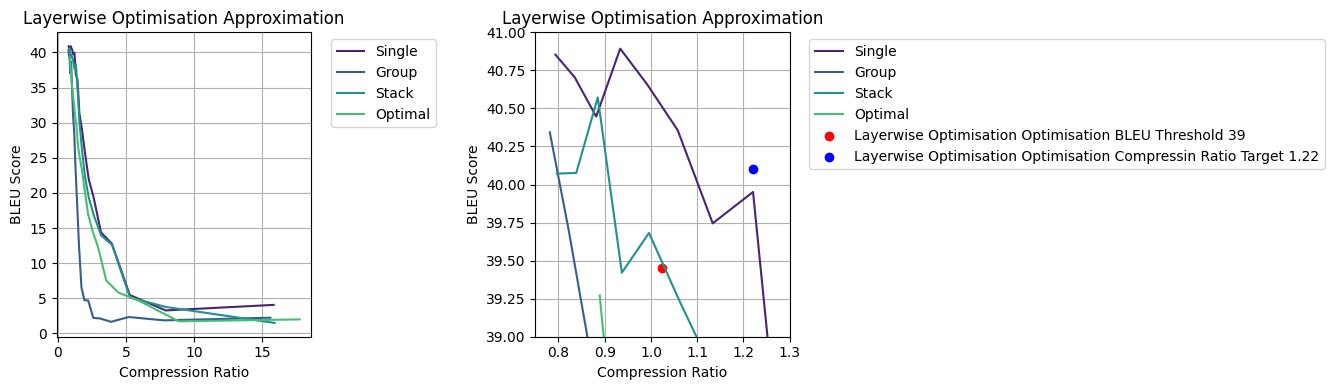

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

single = pd.read_csv('layered_optimal_single_results.csv')
group = pd.read_csv('layered_optimal_group_results.csv')
stack = pd.read_csv('layered_optimal_stack_results.csv')
optimal = pd.read_csv('layered_optimal_results.csv')

# Colormap
colormap = plt.get_cmap('viridis')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))


# Plot Single
axs[0].plot(single['Compression Ratio']/8, single['BLEU Score'], 
            color=colormap(0.1), label='Single')
# Plot Group
axs[0].plot(group['Compression Ratio']/8, group['BLEU Score'], 
            color=colormap(0.3), label='Group')
# Plot Stack
axs[0].plot(stack['Compression Ratio']/8, stack['BLEU Score'], 
            color=colormap(0.5), label='Stack')

axs[0].plot(optimal['Compression Ratio']/8, optimal['BLEU Score'], 
            color=colormap(0.7), label='Optimal')

axs[0].set_title(f'Layerwise Optimisation Approximation')
axs[0].set_xlabel('Compression Ratio')
axs[0].set_ylabel('BLEU Score')

# Add legend outside the plot area
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)


# Plot Single
axs[1].plot(single['Compression Ratio']/8, single['BLEU Score'], 
            color=colormap(0.1), label='Single')
# Plot Group
axs[1].plot(group['Compression Ratio']/8, group['BLEU Score'], 
            color=colormap(0.3), label='Group')
# Plot Stack
axs[1].plot(stack['Compression Ratio']/8, stack['BLEU Score'], 
            color=colormap(0.5), label='Stack')

axs[1].plot(optimal['Compression Ratio']/8, optimal['BLEU Score'], 
            color=colormap(0.7), label='Optimal')

x = 1.0237600562368194
y = 39.4484329623815

# Create a scatter plot for a single point
axs[1].scatter(x, y, color='red',label='Layerwise Optimisation Optimisation BLEU Threshold 39')

x1 = 1.2206369901285155
y1 = 40.10513366081188

axs[1].scatter(x1, y1, color='blue',label='Layerwise Optimisation Optimisation Compressin Ratio Target 1.22')

axs[1].set_title(f'Layerwise Optimisation Approximation')
axs[1].set_xlabel('Compression Ratio')
axs[1].set_ylabel('BLEU Score')



# Add legend outside the plot area
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)
axs[1].set_xlim([0.75,1.3])
axs[1].set_ylim([39,41])



# Adjust layout to make space for legends outside the plotting area
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


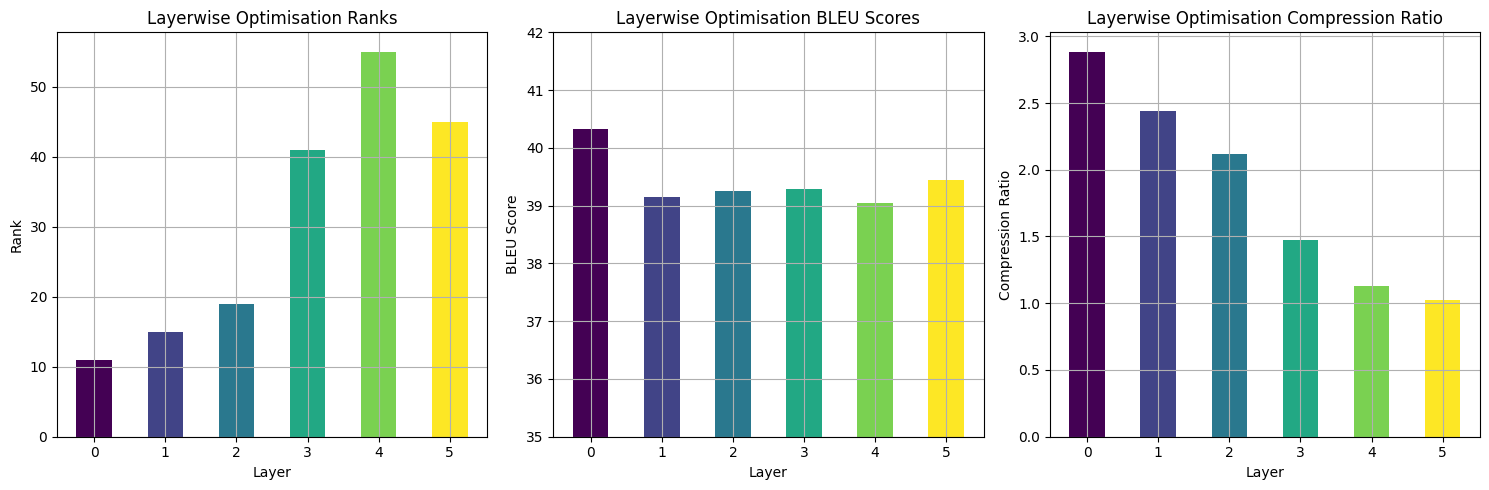

In [106]:
# Data
layerwise_ranks = [11, 15, 19, 41, 55, 45]
layerwise_bleu = [40.324907279875546, 39.15018907063592, 39.25877839479438, 39.28212188205292, 39.03981112018271, 39.4484329623815]
layerwise_compression_ratio = [2.8851419766674002, 2.441273980257031, 2.115770782889427, 1.4761191508530886, 1.1254099908986313, 1.0237600562368194]

# Number of layers
layers = np.arange(len(layerwise_ranks))

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Set colormap
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(layers)))

# Bar plot for ranks
ax[0].bar(layers, layerwise_ranks, color=colors, width=0.5)
ax[0].set_title('Layerwise Optimisation Ranks')
ax[0].set_xlabel('Layer')
ax[0].set_ylabel('Rank')
ax[0].grid(True)

# Bar plot for BLEU scores
ax[1].bar(layers, layerwise_bleu, color=colors, width=0.5)
ax[1].set_title('Layerwise Optimisation BLEU Scores')
ax[1].set_xlabel('Layer')
ax[1].set_ylim([35,42])
ax[1].set_ylabel('BLEU Score')
ax[1].grid(True)

# Bar plot for Compression Ratio
ax[2].bar(layers, layerwise_compression_ratio, color=colors, width=0.5)
ax[2].set_title('Layerwise Optimisation Compression Ratio')
ax[2].set_xlabel('Layer')
ax[2].set_ylabel('Compression Ratio')
ax[2].grid(True)

# Show plot
plt.tight_layout()
plt.show()


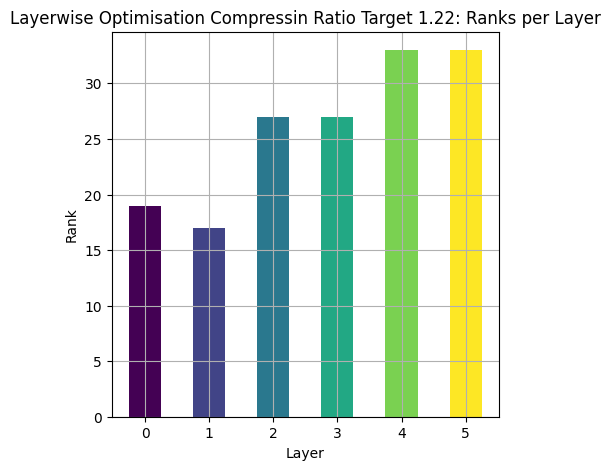

In [117]:
layerwise_ranks = [19, 17, 27, 27, 33, 33]

# Number of layers
layers = np.arange(len(layerwise_ranks))

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Set colormap
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(layers)))

# Bar plot for ranks
ax.bar(layers, layerwise_ranks, color=colors, width=0.5)
ax.set_title('Layerwise Optimisation Target Compressin Ratio 1.22: Ranks per Layer')
ax.set_xlabel('Layer')
ax.set_ylabel('Rank')
ax.grid(True)